<a href="https://colab.research.google.com/github/nareshsangem/Fluid.ai_assignment/blob/main/Fluid_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pymupdf


In [ ]:
pip install spacy

In [ ]:

from google.colab import files
uploaded = files.upload()
pdf_path = "Transcript Call.pdf"  # Adjust filename accordingly

Saving Transcript Call.pdf to Transcript Call.pdf



Key Insights:
1. INE284S01014 
 
Dear Sir/Madam, 
 
 
Subject: Transcripts of Analysts/Investor Meet/ Earnings Call of the Company pertaining to Q1 of FY 
2023-24 
Please find enclosed the transcripts of the Analysts/Investor Meet/ Earnings Call of Q1 FY 2023-24 held 
on July 27, 2023.
2. Earnings Conference Call 
 
July 27, 2023 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
ANALYST: 
MR.
3. DEVANSHI DHRUVA – HEAD – INVESTOR  RELATIONS 
 
 
 

 
SJS Enterprises 
July 27, 2023 
 
Moderator: 
Ladies and gentlemen, good day and welcome to the SJS Enterprises 1Q FY24 Earnings 
Conference Call hosted by JM Financial.
4. Ronak Mehta: 
From JM Financial Institutional Securities, I welcome you all to 1Q FY24 Earnings Call of SJS 
Enterprises.
5. Sanjay will take you all through the industry view, our business performance and also give a 
strategic outlook for the future growth of the company at the end.

Key Features:
Growth: 66 insights
Finance: 36 insights
Market: 14 insights
Investment: 11 insights


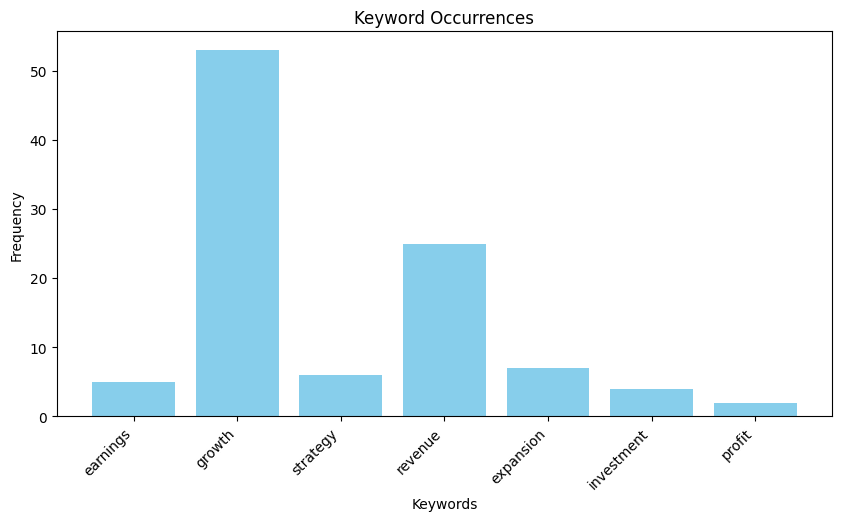

In [ ]:
import fitz  # PyMuPDF for PDF extraction
import spacy
import os
import matplotlib.pyplot as plt
from collections import Counter

def extract_text_from_pdf(pdf_path):
    if not os.path.exists(pdf_path):
        print(f"Error: File '{pdf_path}' not found.")
        return ""

    doc = fitz.open(pdf_path)
    return "\n".join(page.get_text("text") for page in doc)

def extract_key_sentences(text, nlp, keywords):
    doc = nlp(text)
    return [sent.text.strip() for sent in doc.sents if any(keyword in sent.text.lower() for keyword in keywords)]

def generate_keyword_graph(sentences, keywords):
    keyword_count = Counter()
    for sentence in sentences:
        for keyword in keywords:
            if keyword in sentence.lower():
                keyword_count[keyword] += 1

    if not keyword_count:
        print("No relevant keywords found.")
        return

    plt.figure(figsize=(10, 5))
    plt.bar(keyword_count.keys(), keyword_count.values(), color='skyblue')
    plt.xlabel("Keywords")
    plt.ylabel("Frequency")
    plt.title("Keyword Occurrences")
    plt.xticks(rotation=45, ha='right')
    plt.show()

def extract_key_features(text):
    categories = {"Growth": ["growth", "expansion"], "Finance": ["revenue", "profit", "earnings"], "Market": ["market", "trends"], "Investment": ["investment", "opportunity"]}
    key_features = {cat: [] for cat in categories}
    for line in text.split("\n"):
        for cat, words in categories.items():
            if any(word in line.lower() for word in words):
                key_features[cat].append(line.strip())
    return key_features

def main(pdf_path):
    nlp = spacy.load("en_core_web_sm")
    keywords = ["growth", "revenue", "profit", "forecast", "investment", "expansion", "strategy", "earnings"]

    text = extract_text_from_pdf(pdf_path)
    if not text:
        return

    key_sentences = extract_key_sentences(text, nlp, keywords)
    key_features = extract_key_features(text)

    if key_sentences:
        print("\nKey Insights:")
        for idx, sentence in enumerate(key_sentences[:5], 1):
            print(f"{idx}. {sentence}")

    print("\nKey Features:")
    for category, features in key_features.items():
        if features:
            print(f"{category}: {len(features)} insights")

    generate_keyword_graph(key_sentences, keywords)

if __name__ == "__main__":
    pdf_path = "Transcript Call.pdf"  # Change this to your PDF file path
    main(pdf_path)
